# **Problem Statment**

Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not



# **Importing Libraries**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [31]:
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [32]:
df=pd.read_csv('Fraud_check.csv')

In [33]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# **Performing EDA**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [36]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

**As we can see above there are no null values in our dataset.**

<Axes: >

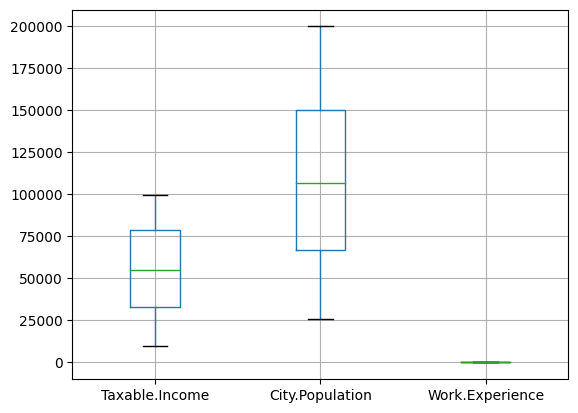

In [37]:
df.boxplot()

**As we can see above there are no outliers in our dataset.**

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


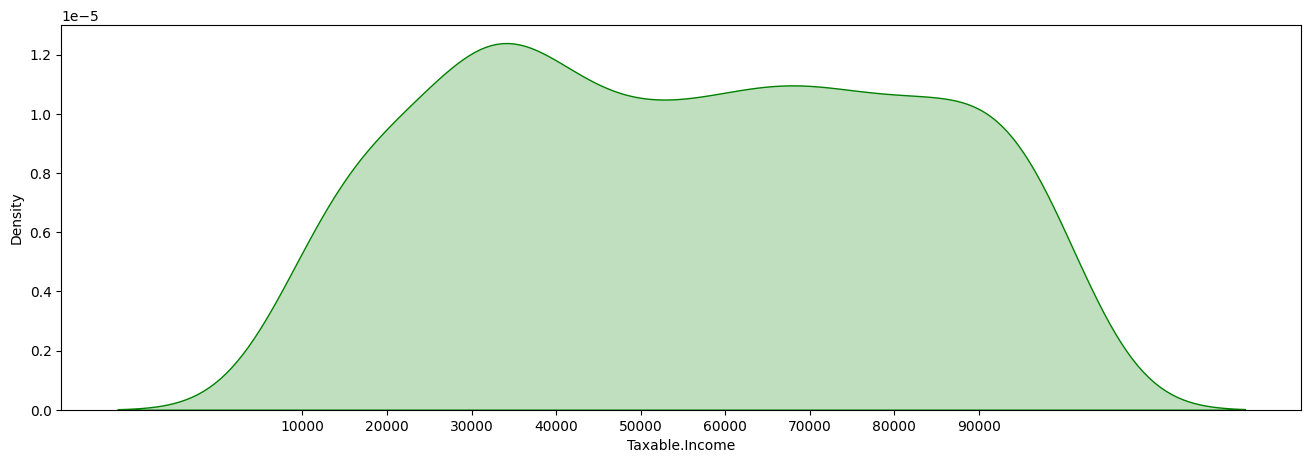

In [38]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

**The data is Skwed on the righ**t

**The data has negative Kurtosis**

In [39]:
obj_colum = df.select_dtypes(include='object').columns.tolist()

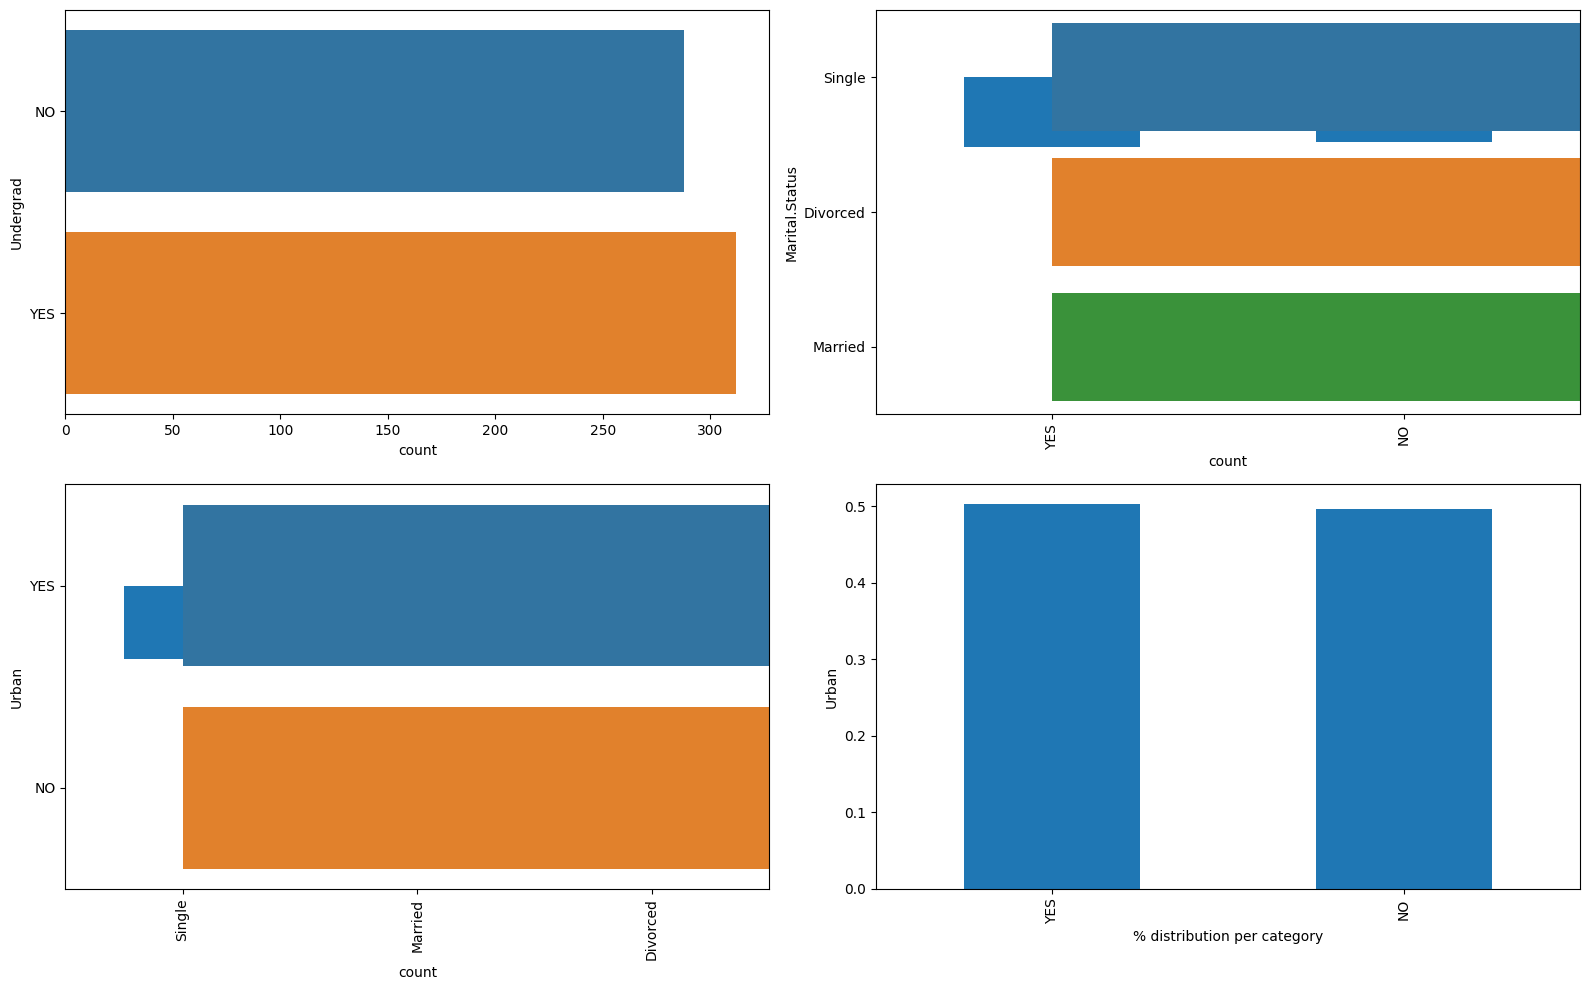

In [40]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [41]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

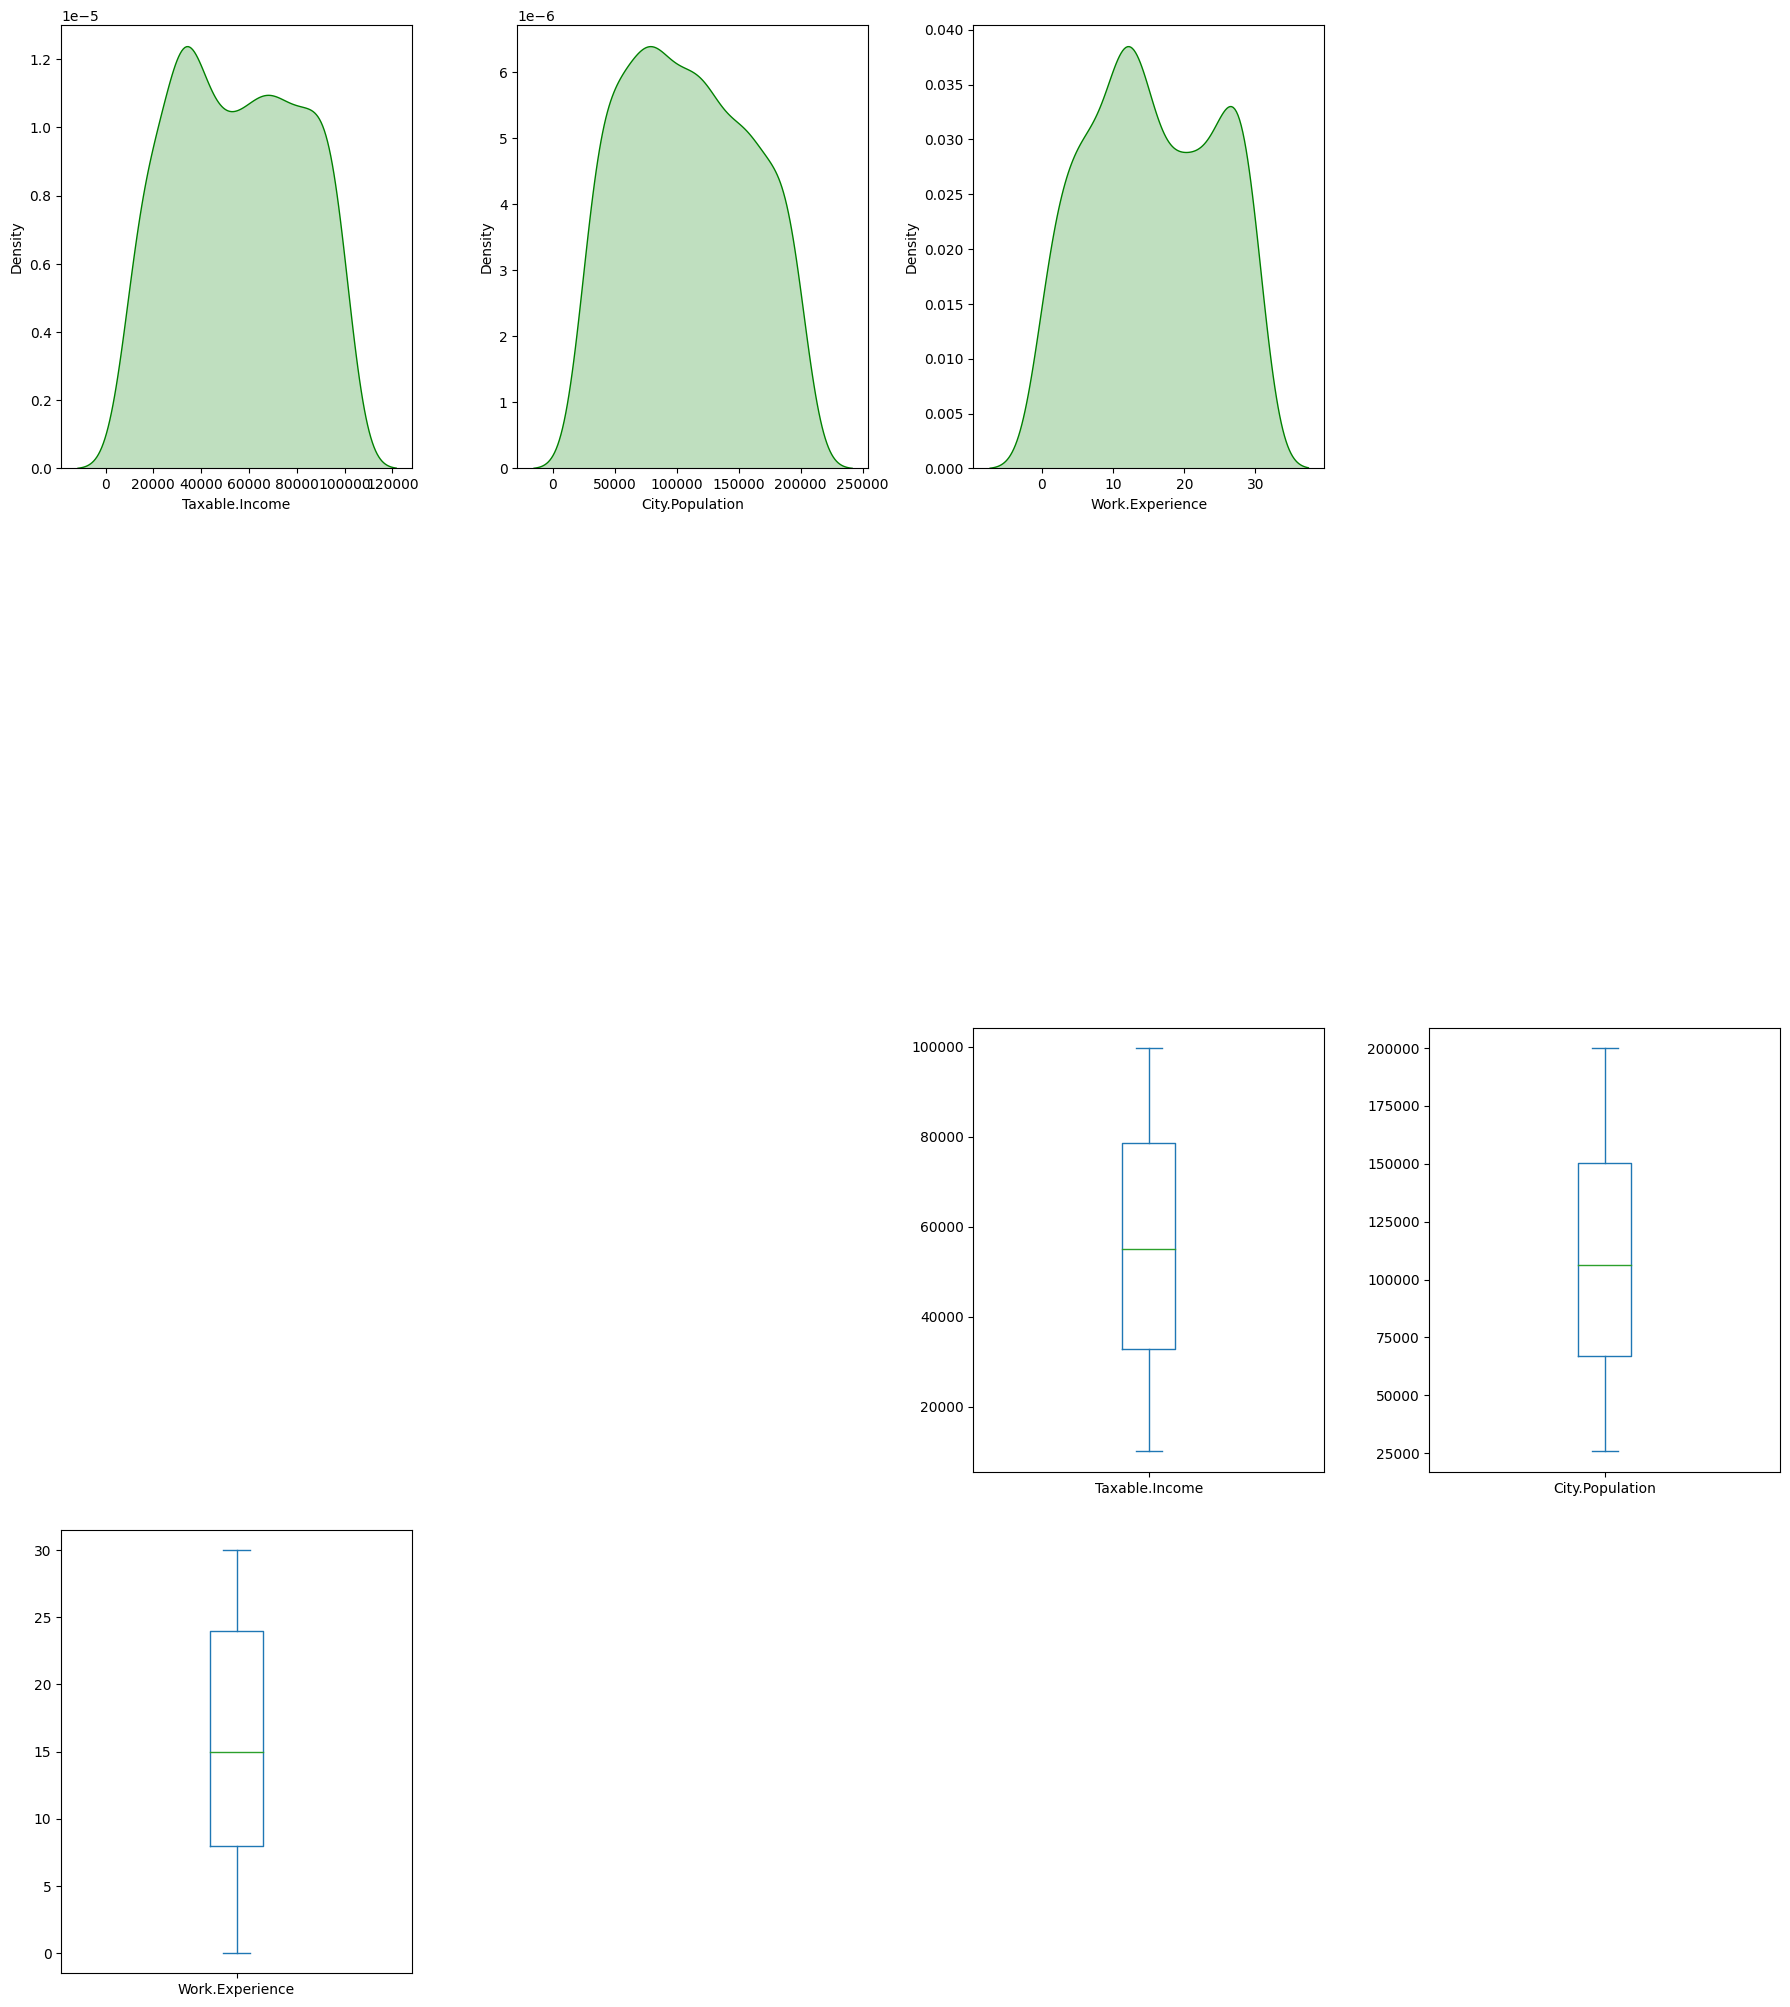

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [42]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [43]:
df1 = pd.get_dummies(df, columns = ['Undergrad','Marital.Status','Urban'])

In [44]:
corr = df1.corr()

<Axes: >

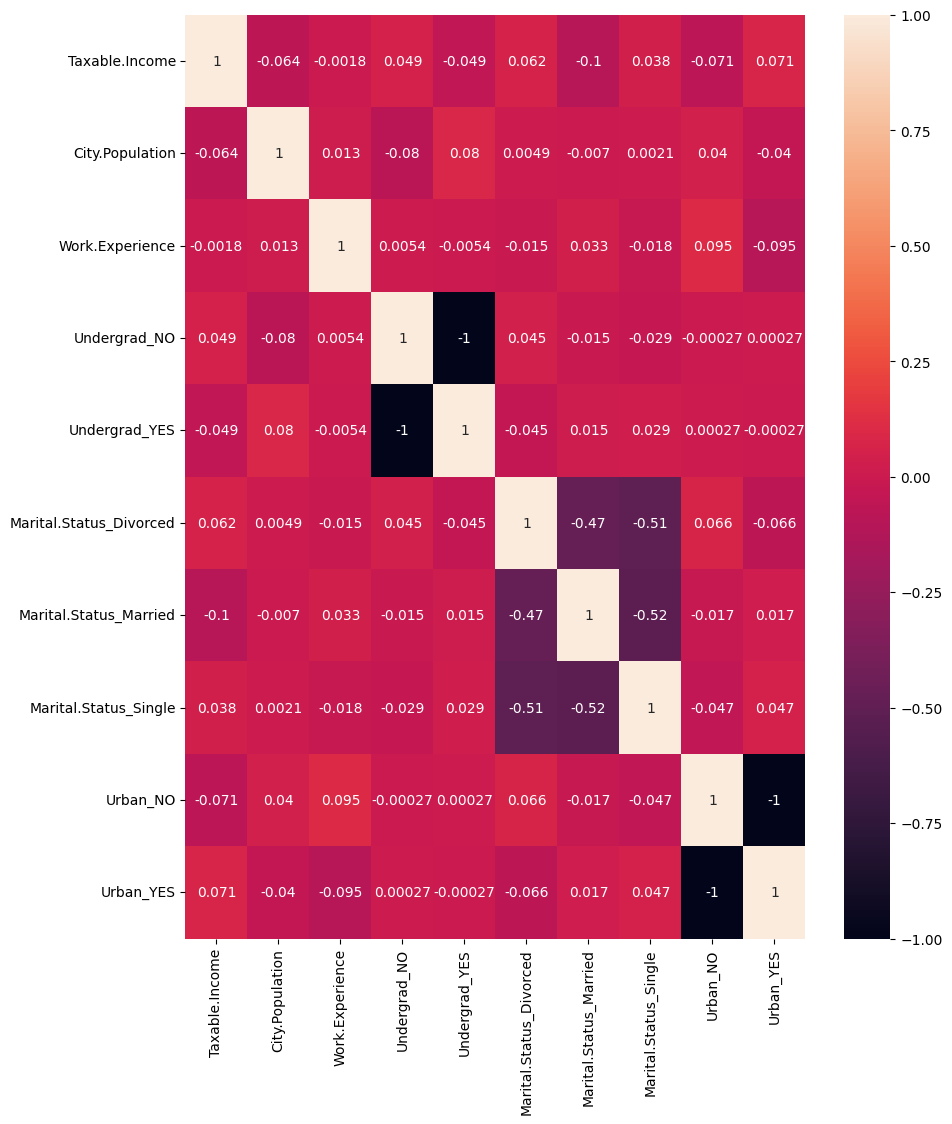

In [45]:
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot = True)

**Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"**

In [46]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [47]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

# **Splitting the data into Train and Test**

In [48]:
x = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [49]:
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [50]:
y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [51]:
y.value_counts()

good     476
risky    124
Name: Taxable.Income, dtype: int64

**As we can see our target column is imbalanced so we have to make that balanced by using SMOTE for better Model Accuracy.**

# SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
x_resampled,y_resampled=SMOTE().fit_resample(x,y)

In [54]:
x_resampled

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
947,123349,9,0,0,0,0,0,0,0
948,76205,4,0,1,0,0,0,0,1
949,76216,4,0,1,0,0,0,0,1
950,88217,17,0,1,0,0,1,0,1


In [55]:
y_resampled

0       good
1       good
2       good
3       good
4       good
       ...  
947    risky
948    risky
949    risky
950    risky
951    risky
Name: Taxable.Income, Length: 952, dtype: category
Categories (2, object): ['risky' < 'good']

In [56]:
y_resampled.value_counts()

risky    476
good     476
Name: Taxable.Income, dtype: int64

**So after applying the smote technique now we have balanced data in target column.**

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size = 0.2, stratify = y_resampled)

# **Preparing the Model : Decision Tree**

In [59]:
dec0=DecisionTreeClassifier(criterion='entropy',random_state=33,max_depth=None)
dec0.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

In [61]:
y_pred=dec0.predict(x_test)
y_pred

array(['good', 'risky', 'risky', 'good', 'good', 'risky', 'good', 'good',
       'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'risky',
       'good', 'good', 'good', 'risky', 'risky', 'good', 'risky', 'good',
       'risky', 'risky', 'risky', 'good', 'risky', 'good', 'risky',
       'good', 'good', 'good', 'risky', 'risky', 'good', 'risky', 'risky',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky',
       'risky', 'risky', 'risky', 'good', 'risky', 'good', 'good', 'good',
       'good', 'risky', 'risky', 'good', 'good', 'risky', 'risky',
       'risky', 'risky', 'good', 'risky', 'good', 'risky', 'good',
       'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'risky',
       'risky', 'risky', 'good', 'good', 'good', 'risky', 'risky',
       'risky', 'good', 'risky', 'good', 'risky', 'risky', 'risky',
       'risky', 'risky', 'good', 'risky', 'risky', 'good', 'good', 'good',
       'risky', 'good', 'risky', 'risky', 'good', 'risky', 'risky',


In [62]:
accuracy_score(y_test,y_pred)

0.8010471204188482

**As we can see above when we kept max_depth=none then we got the model accuracy 80%.so now lets visualize it.**

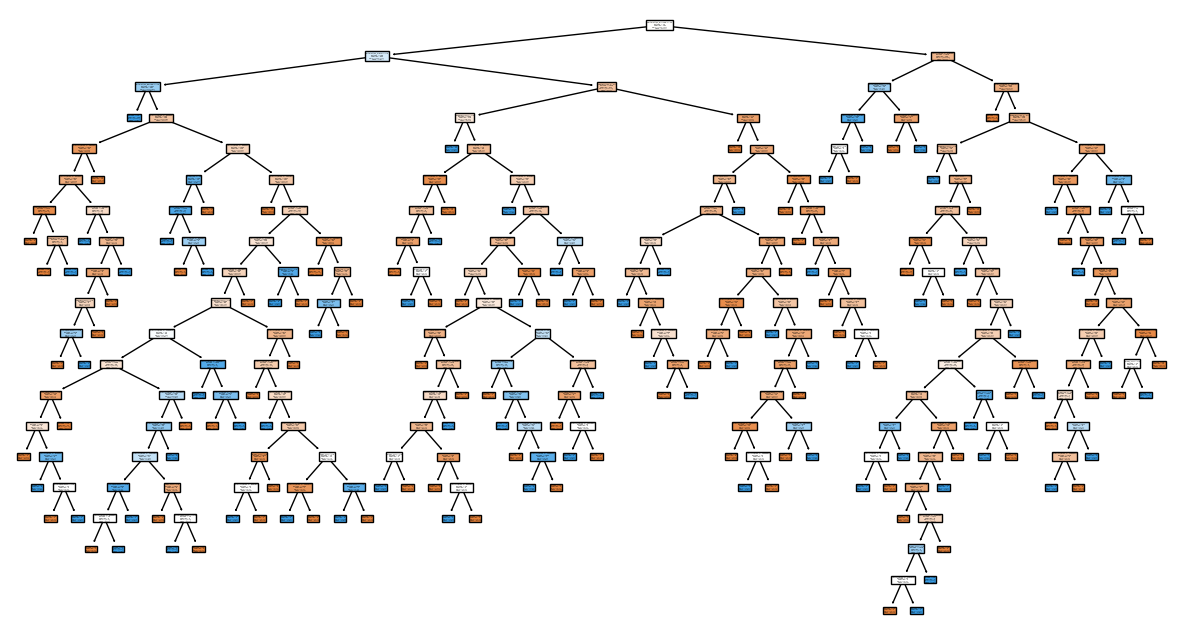

In [64]:
plt.figure(figsize=(15,8))
tree.plot_tree(dec0,feature_names=x.columns,class_names=['good', "risky"],
                       filled=True)
plt.show()

# **Hyperparameter Tunning for decision tree by using Grid Search CV**

In [65]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [68]:
grid_search = GridSearchCV(estimator=dec0,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1)

In [69]:
grid = grid_search.fit(x_train,y_train)

In [70]:
grid.best_score_

0.7542913656690746

In [71]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}

**So as we can see above the best accuracy score that we have got from Hyperparameter tunnig(Grid SearchCV) is 75% with the parameters max_depth=3,criterion=gini and min_samples_leaf=50.**

**So now make the model using the parameters that we have got through Hyperparameter Tunning.**

# **Final Model**

In [81]:
dec1=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=50)
dec1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50)

In [82]:
y_pred1=dec1.predict(x_test)
y_pred1

array(['good', 'risky', 'risky', 'good', 'good', 'risky', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good',
       'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good',
       'good', 'risky', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'risky', 'risky', 'good', 'risky', 'good', 'good',
       'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'good', 'risky', 'good', 'risky', 'good',
       'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good',
       'good', 'good', 'risky', 'risky', 'risky', 'good', 'risky', 'good',
       'risky', 'risky', 'risky', 'good', 'risky', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'risky', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'g

In [83]:
accuracy_score(y_test,y_pred1)

0.7643979057591623

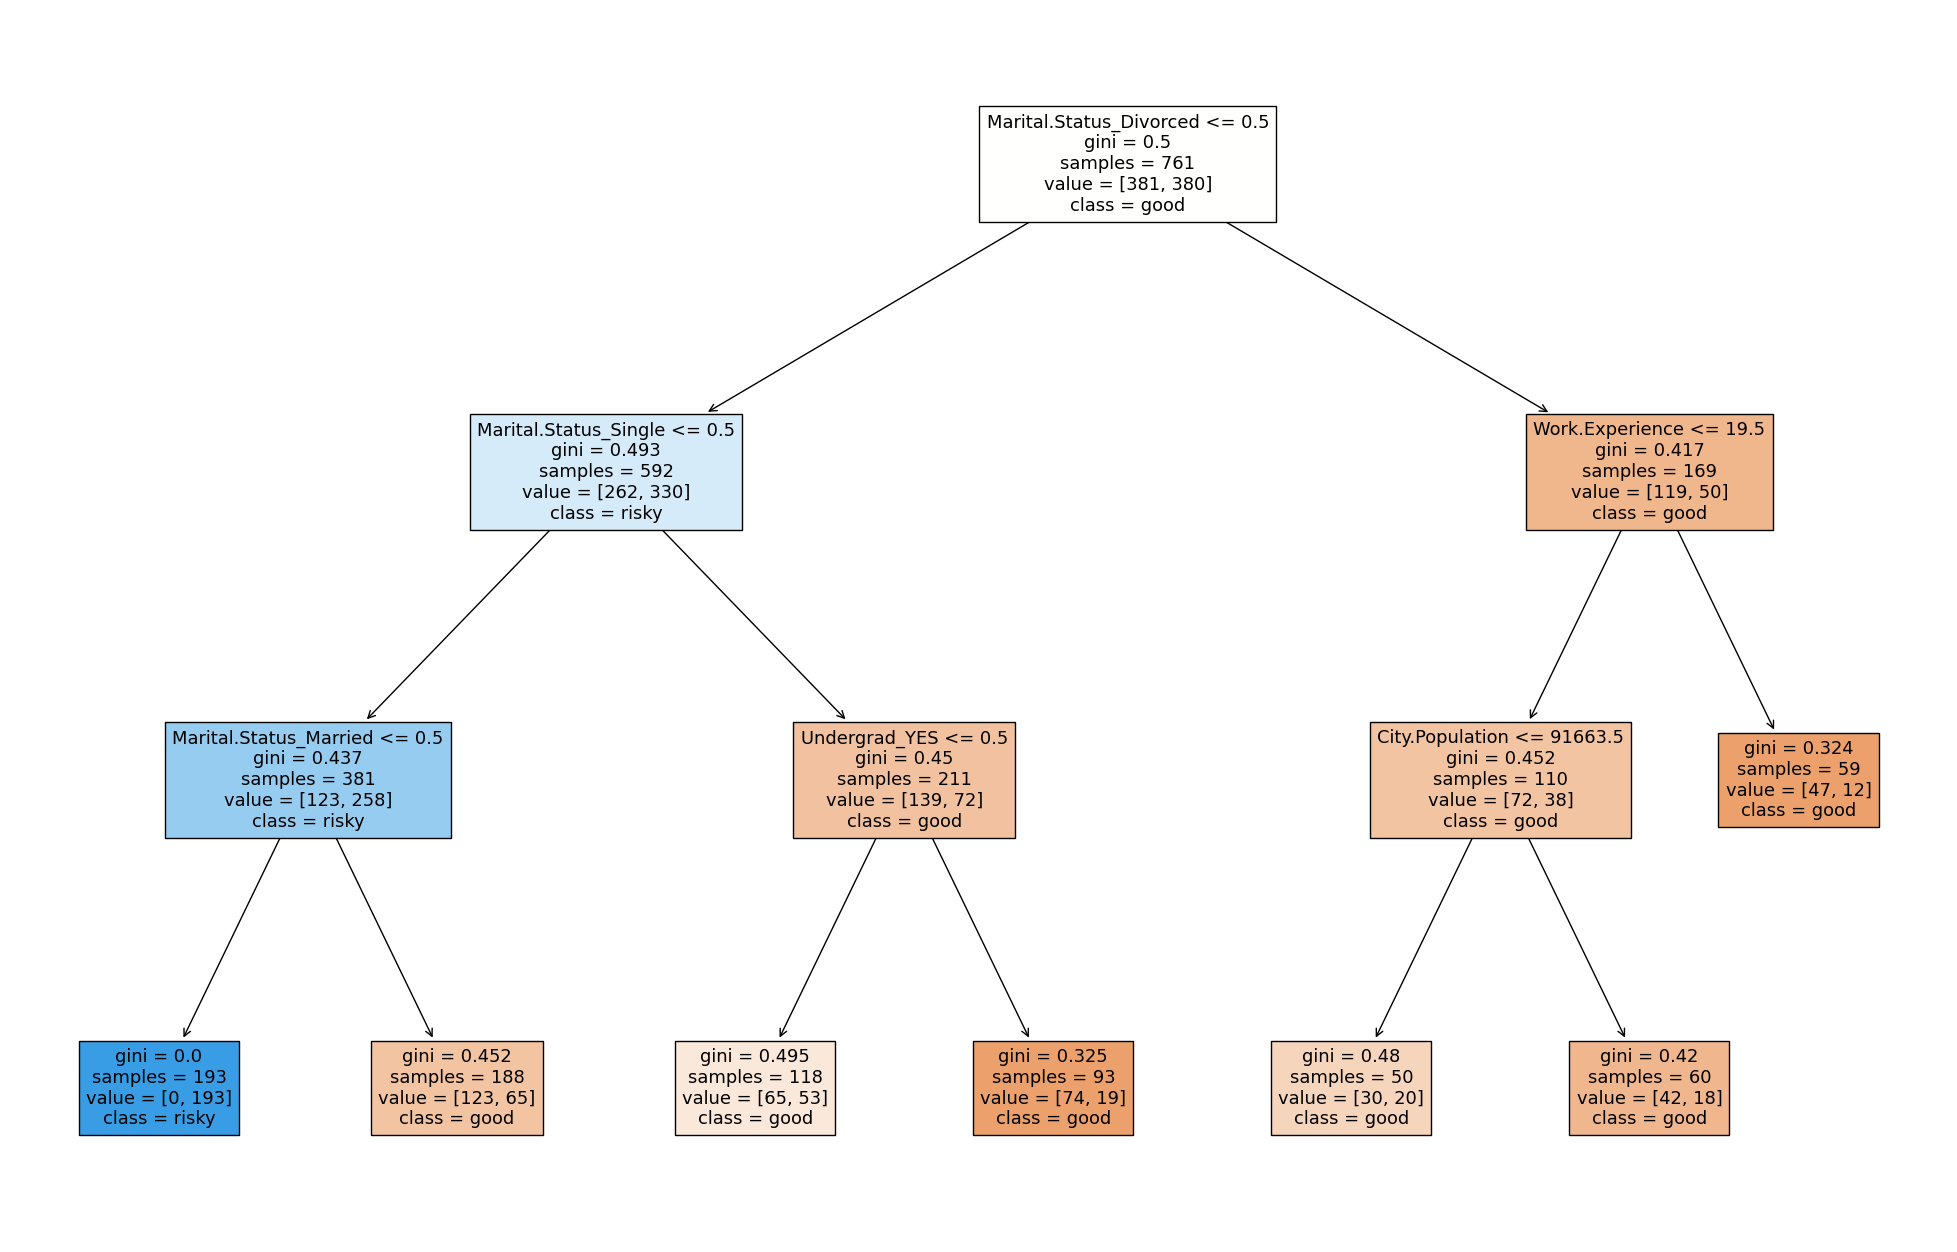

In [84]:
plt.figure(figsize=(25,16))
tree.plot_tree(dec1,feature_names=x.columns,class_names=['good', "risky"],
                       filled=True)
plt.show()

In [85]:
dec1.feature_importances_

array([0.00393827, 0.01119199, 0.        , 0.04502613, 0.1298946 ,
       0.5886558 , 0.22129322, 0.        , 0.        ])

In [86]:
fi1 = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': dec1.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [87]:
fi1

,feature,importance
5,Marital.Status_Married,0.588656
6,Marital.Status_Single,0.221293
4,Marital.Status_Divorced,0.129895
3,Undergrad_YES,0.045026
1,Work.Experience,0.011192
0,City.Population,0.003938
2,Undergrad_NO,0.000000
7,Urban_NO,0.000000
8,Urban_YES,0.000000


In [88]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5best features

                  Features         Score
0          City.Population  11018.431666
4  Marital.Status_Divorced     27.990597
6    Marital.Status_Single     21.099198
5   Marital.Status_Married     17.741541
3            Undergrad_YES     14.182117
